In [51]:
"""
Refactored web scraper script with shiny new feature.

Site I'm using to scrape:
https://www.imdb.com/chart/top/?ref_=nv_mv_250

Research question:
The 1970's is often lauded as producing some of the most critically
acclaimed films in cinematic history. However, how many of IMDB's Top
250 films are actually from the 70's and what is the proportion of the whole?
If not the seventies, then which decade is the most "critically acclaimed"?

- using matplotlib
    - %matplotlib inline (for jupiter notebooks)

"""
# Import statements

from bs4 import BeautifulSoup
import json
import urllib.request
import matplotlib.pyplot as plot

%matplotlib inline

In [52]:
def get_html_text(url):
    """
    Function takes a URL and grabs the HTML from the internet
    """
    # build request object
    request = urllib.request.Request(url)
    # access network via standard gateway
    # to retrieve HTML from the IMDB server
    with urllib.request.urlopen(request) as reply:
        return reply.read()

def clean_movie_years(dictionary):
    """
    iterate over each of the raw release years in the movie_years list
    and slice the list elements so only the digits are extracted
    """
    for films in dictionary["movie_years"]:
        dictionary["clean_years"].append(int(films[1:5]))


def sort_movie_years(clean_dictionary, final_dictionary):
    """
    iterate over the list of cleaned release years in clean_years and
    sort them into lists representing each decade from 1920 to 2019
    """
    for flicks in clean_dictionary["clean_years"]:
        if flicks in range(1920,1930):
            final_dictionary["twenties_films"].append(flicks)
        if flicks in range(1930,1940):
            final_dictionary["thirties_films"].append(flicks)
        if flicks in range(1940,1950):
            final_dictionary["forties_films"].append(flicks)
        if flicks in range(1950,1960):
            final_dictionary["fifties_films"].append(flicks)
        if flicks in range(1960,1970):
            final_dictionary["sixties_films"].append(flicks)
        if flicks in range(1970,1980):
            final_dictionary["seventies_films"].append(flicks)
        if flicks in range(1980,1990):
            final_dictionary["eighties_films"].append(flicks)
        if flicks in range(1990,2000):
            final_dictionary["nineties_films"].append(flicks)
        if flicks in range(2000,2010):
            final_dictionary["aughts_films"].append(flicks)
        if flicks in range(2010,2020):
            final_dictionary["teens_films"].append(flicks)


Film count of Top 250 by decade: 
6
6
11
24
18
17
30
40
49
49


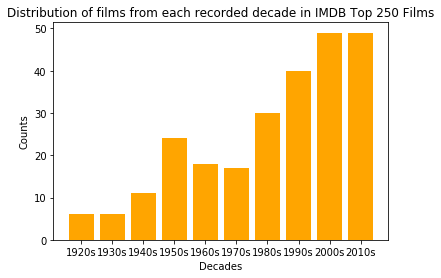

Proportion of Top 250 by decade: 
2.4%
2.4%
4.4%
9.6%
7.2%
6.8%
12.0%
16.0%
19.6%
19.6%



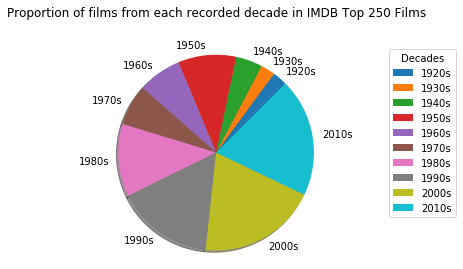

In [55]:
def main():
    # Initialize URL to scrape, cleaning_dictionary, decade_dictionary 
    url = "https://www.imdb.com/chart/top/?ref_=nv_mv_250"
    
    cleaning_dict = {
    "movie_years" : [],
    "clean_years" : [],
    }

    decade_dict = {
    "twenties_films" : [],
    "thirties_films" : [],
    "forties_films" : [],
    "fifties_films" :[],
    "sixties_films" : [],
    "seventies_films" : [],
    "eighties_films" : [],
    "nineties_films" : [],
    "aughts_films" : [],
    "teens_films" : []
    }
    
    # Get the HTML
    imdb_html = get_html_text(url)
    # Pass raw HTML and desired parser to beautiful soup
    soup = BeautifulSoup(imdb_html, 'html.parser')
    # Pull section of HTML containing movie titles out of the soup and store in a variable
    movie_titles = soup.find_all('td', 'titleColumn')
    # From the subsection of HTML extract only the movies' release years
    for movies in movie_titles:
        year = movies.find('span').string
        cleaning_dict["movie_years"].append(year)
    # Clean the data so that it is only represented as an integer
    clean_years = clean_movie_years(cleaning_dict)
    # Sort the release years into keys that correspond to the decade in which they were released
    sorted_movies = sort_movie_years(cleaning_dict, decade_dict)
    
    # intialize additional variables to conduct calculations
    total_films = 250
    proportions = []
    counter = []

    # calculate the proportions for each decade and store them in a list
    for decade, years in decade_dict.items():
        proportions.append((len(years)/total_films) * 100)

    for dec, flix in decade_dict.items():
        counter.append(len(flix))
        
    decades = ["1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]
    
    print()
    print("Film count of Top 250 by decade: ")
    
    for co in counter:
        print(co)
    
    plot.bar(decades, counter, color='orange')
    plot.title("Distribution of films from each recorded decade in IMDB Top 250 Films")
    plot.xlabel("Decades")
    plot.ylabel("Counts")
    plot.show()
    
    print("Proportion of Top 250 by decade: ")
    for p in proportions:
        print("{:2.1f}%".format(p))
    print()
    
    plot.pie(counter, labels=decades,shadow=True, startangle=45)
    plot.axis('equal')
    plot.title("Proportion of films from each recorded decade in IMDB Top 250 Films", y=1.1)
    plot.legend(title="Decades", bbox_to_anchor=(1,1), ncol=1)
    plot.show()
    
    
if __name__ == "__main__":
    main()